## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>

This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).

The dataset we use for this part is the [STL10 dataset](https://cs.stanford.edu/~acoates/stl10/) which consists of $5,000$ training images of airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck; each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:

1. `DatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. 
2. `BaseImageClassifier`: A base class image classfication, which is basically a CNN model.

*Note*: You may need to install the package `imutils` if you have not installed yet

Firstly, we need to run the following cells to load required packages.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from A1_S2_2023 import DatasetManager, BaseImageClassifier

c:\Users\bryan\anaconda3\envs\tf2_cpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Note that the class `DatasetManager` has attributes related to *the training, validation, and testing sets*. You can use them in training your developped models in the sequel.

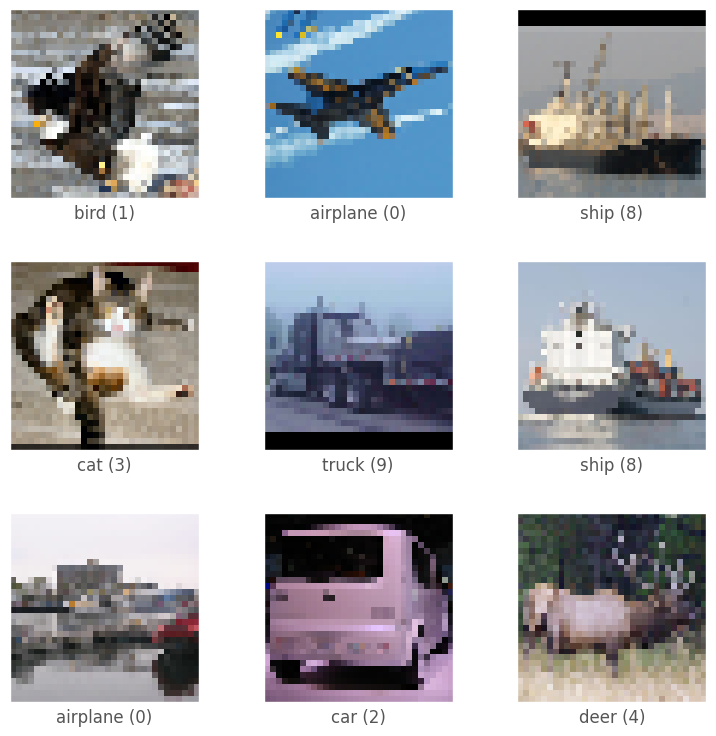

In [4]:
dataset_name = 'stl10'
# Choose path to store dataset
data_dir = r'C:\Users\bryan\Code\Python\Projects\FIT3181\32882424_A1_solution\datasets'.format(os.path.expanduser('~'))

data_manager = DatasetManager(dataset_name, data_dir)
data_manager.load_dataset() 
data_manager.preprocess_dataset()
data_manager.show_examples()

In [14]:
# Choose a random example
import random
num_examples = tf.data.experimental.cardinality(data_manager.ds_train).numpy()
random_index = random.randint(0, num_examples - 1)
example = next(iter(data_manager.ds_train.skip(random_index).take(1)))[0]

# Print the shape and value of the image
print("Image shape:", example.shape)
print("Image value range:", example.numpy().min(), "to", example.numpy().max())

Image shape: (32, 32, 3)
Image value range: 0.03529412 to 1.0


In [7]:
# Check the number of examples in each dataset
print(tf.data.experimental.cardinality(data_manager.ds_train))
print(tf.data.experimental.cardinality(data_manager.ds_val))
print(tf.data.experimental.cardinality(data_manager.ds_test))

tf.Tensor(4500, shape=(), dtype=int64)
tf.Tensor(500, shape=(), dtype=int64)
tf.Tensor(8000, shape=(), dtype=int64)


We now use **BaseImageClassifier** built in the **A1_S2_2023.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated with.

In [8]:
network1 = BaseImageClassifier(name='network1',
                       num_classes=10,
                       optimizer='sgd',
                       batch_size=128,
                       num_epochs=20,
                       learning_rate=0.001)

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **A1_S2_2023.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [9]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 average_pooling2d (Average  (None, 16, 16, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_1 (Avera  (None, 8, 8, 64)          0         
 gePooling2D)                                         

In [8]:
x_train_batch = network1.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = network1.optimize_data_pipeline(data_manager.ds_val, batch_size=32)
network1.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 11s 72ms/step - loss: 2.2994 - accuracy: 0.1182 - val_loss: 2.2937 - val_accuracy: 0.1520
Epoch 2/20
141/141 [==============================] - 9s 64ms/step - loss: 2.2893 - accuracy: 0.1458 - val_loss: 2.2742 - val_accuracy: 0.1520
Epoch 3/20
141/141 [==============================] - 9s 65ms/step - loss: 2.2487 - accuracy: 0.1598 - val_loss: 2.1833 - val_accuracy: 0.1720
Epoch 4/20
141/141 [==============================] - 8s 57ms/step - loss: 2.1124 - accuracy: 0.2398 - val_loss: 2.0183 - val_accuracy: 0.2700
Epoch 5/20
141/141 [==============================] - 9s 62ms/step - loss: 1.9694 - accuracy: 0.2871 - val_loss: 1.9078 - val_accuracy: 0.3180
Epoch 6/20
141/141 [==============================] - 9s 62ms/step - loss: 1.8781 - accuracy: 0.3264 - val_loss: 1.8538 - val_accuracy: 0.3340
Epoch 7/20
141/141 [==============================] - 8s 56ms/step - loss: 1.8130 - accuracy: 0.3436 - val_loss: 1.8032 - val_accuracy: 0.346

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [9]:
x_test_batch = network1.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
network1.compute_accuracy(x_test_batch)

250/250 [==============================] - 5s 19ms/step - loss: 1.5552 - accuracy: 0.4389
loss: 1.5551570653915405
accuracy: 0.4388749897480011


Below shows how you can inspect the training progress.

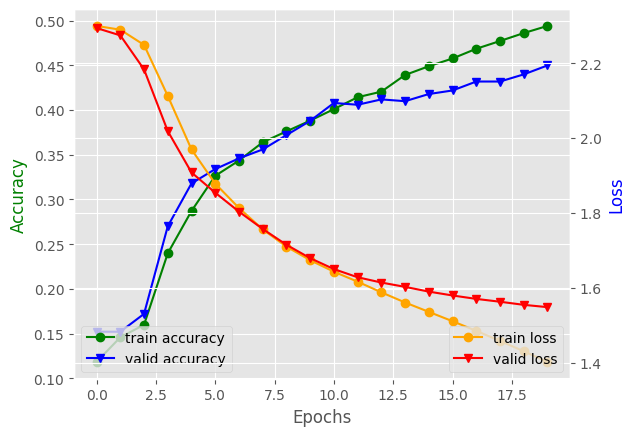

In [10]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [10]:
number_samples = 25
sample_dataset = data_manager.ds_test.take(number_samples)
network1.predict(sample_dataset.batch(number_samples), data_manager.ds_info)

1/1 [==============================] - 0s 247ms/step
Sample 1: Predicted label - bird
Sample 2: Predicted label - deer
Sample 3: Predicted label - bird
Sample 4: Predicted label - bird
Sample 5: Predicted label - deer
Sample 6: Predicted label - deer
Sample 7: Predicted label - bird
Sample 8: Predicted label - car
Sample 9: Predicted label - deer
Sample 10: Predicted label - cat
Sample 11: Predicted label - bird
Sample 12: Predicted label - deer
Sample 13: Predicted label - bird
Sample 14: Predicted label - deer
Sample 15: Predicted label - bird
Sample 16: Predicted label - bird
Sample 17: Predicted label - bird
Sample 18: Predicted label - bird
Sample 19: Predicted label - bird
Sample 20: Predicted label - dog
Sample 21: Predicted label - deer
Sample 22: Predicted label - bird
Sample 23: Predicted label - bird
Sample 24: Predicted label - deer
Sample 25: Predicted label - bird


Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

1/1 [==============================] - 0s 96ms/step


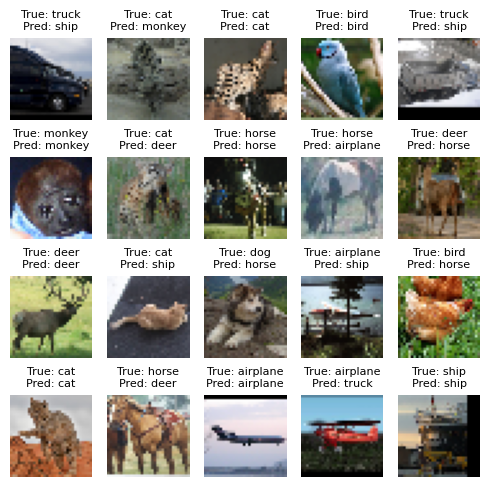

In [12]:
number_samples = 20
sample_dataset = data_manager.ds_test.take(number_samples)
network1.plot_predictions(sample_dataset, data_manager.ds_info, number_samples=number_samples, grid_shape=(4, 5))

### <span style="color:#0b486b">Question 3.1: Observe the learning curve</span> 
After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*# WRITE YOUR ANSWER AND OBSERVATION HERE*
<br>
<br>
Based on the observations above, the model's performance is subpar. Out of 20 predictions, only 8 were correct resulting in it having a 40% accuracy rate. Despite there being progress in the learning curve as the training and validation accuracy improves over more training, the overall accuracy still remains low. This could be caused by overfitting, indicated by the significant gap between the training and validation accuracy.

To improve and solve this issue, data augmentation can be employed to generate various clean data variations, which can aid the model in generalizing better to new examples. Expanding the training dataset by incorporating more diverse data can also be beneficial for improving model performance. Additionally, dropout layers or batch normalization or other regularisation techniques could be implemented. These methods help prevent overfitting by adding constraints to the model during training. Finally, early stopping can be implemented during training to monitor the validation loss. When the validation loss stops improving or starts to increase, halt training to prevent overfitting. This can help find the right balance between model complexity and generalisation.

**For questions 3.2 to 3.9**, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters which you can find in function `__init__()` for the class `BaseImageClassifier`:

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block. 

In [5]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(3181)

### <span style="color:#0b486b">Question 3.2: Define your CNN</span>

Write the code of the `YourModel` class here. Note that this class will be inherited from the `BaseImageClassifier` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [6]:

from keras.models import Model
from keras.layers import Activation, Add, AveragePooling2D, BatchNormalization, Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D

class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm=None,
                 is_augmentation=False,
                 activation_func='relu',
                 optimizer='adam',
                 use_skip=True,
                 batch_size=10,
                 num_epochs=20,
                 learning_rate=0.0001,
                 verbose=True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)
    
    def build_cnn(self):
        """
        Build a Convolutional Neural Network (CNN) for image classification.

        This method constructs a CNN architecture with 2 blocks, 32 feature maps, batch normalization if enabled, skip connections enabled by 
        default, activation functions is relu and dropout rate is 0.2. The resulting model is compiled with the adam optimiser, metrics 
        and loss function for training.
        """
        # Define the input layer with the specified height, width, and depth.
        input_layer = Input((self.height, self.width, self.depth))
        x = input_layer  # Start with the input as the current layer.

        i = 0
        # Create convolutional blocks with each iteration (Maximum 2 blocks).
        while i < self.num_blocks:
            # Create the Convolutional Layer using the Conv2D object from keras.layers.
            x = Conv2D(self.feature_maps[i], (3, 3), (1, 1), "same", activation = self.activation_func)(x)

            # Save the current feature map for skip connection.
            x_skip = x
            
            # Run x through the Batch Normalisation (if enabled).
            if self.batch_norm:
                x = BatchNormalization()(x)

            # Run x through the Activation Function.
            x = Activation(activation = self.activation_func)(x)

            # Create another Convolutional Layer
            x = Conv2D(self.feature_maps[i], (3, 3), (1, 1), "same", activation = self.activation_func)(x)

            # Run x through the Batch Normalisation (if enabled).
            if self.batch_norm:
                x = BatchNormalization()(x)

            # If Skip Connection is enabled, add the skip connection to the current x value.
            if self.use_skip:
                x = Add()([x_skip, x])  # Add the skip connection.

            # Run x through the Activation Function.
            x = Activation(activation = self.activation_func)(x)

            # Max-Pooling Layer using AveragePooling2D from keras.layers.
            x = AveragePooling2D((2, 2), (2, 2), "same")(x)

            # If drop_rate is greater than 0, then use Dropout.
            if 0 < self.drop_rate:
                x = Dropout(rate = self.drop_rate)(x)
                
            i += 1      # Increment i by one.

        # Flatten the output.
        x = Flatten()(x)

        # Fully Connected Layer with Softmax Activation Function for classification.
        x = Dense(self.num_classes, "softmax")(x)

        # Create the model with input being the input_layer and outputs being x.
        self.model = Model(input_layer, x)

        # Compile the model with specified optimiser instance variable, metrics, and loss function.
        self.model.compile(optimizer = self.optimizer, metrics = ["accuracy"], loss = "sparse_categorical_crossentropy")

### <span style="color:#0b486b">Question 3.3: Experiment with skip connection</span> 
Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

I observed that when skip connections are employed in the CNN model, the training accuracy reached a perfect 100%, while the validation accuracy finialised at approximately 49.8% by the end of training. Conversely, when the skip connections was disabled, the training accuracy also hit 100% and the validation accuracy stopped at 53.4%. This suggests that both models were capable of fitting the training data perfectly, but the non-skip connection model performed slightly better on the validation data.

Overfitting occurs in both models indicated by the significant gap between the training and validation accuracy
To improve and solve this issue, data augmentation can be employed to generate various clean data variations, which can aid the model in generalizing better to new examples. Expanding the training dataset by incorporating more diverse data can also be beneficial for improving model performance. Additionally, dropout layers or batch normalization or other regularisation techniques could be implemented. These methods help prevent overfitting by adding constraints to the model during training. Finally, early stopping can be implemented during training to monitor the validation loss. When the validation loss stops improving or starts to increase, halt training to prevent overfitting. This can help find the right balance between model complexity and generalisation.

In [15]:
our_network_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0, 
                     batch_norm=True, 
                     use_skip=True,
                     optimizer='sgd',
                     learning_rate=0.001)
our_network_skip.build_cnn()
our_network_skip.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 32, 32, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 32)           128       ['conv2d_4[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 32, 32)           0         ['batch_normalization[0][0

In [16]:
our_network_skip.fit(x_train_batch, x_val_batch, num_epochs = 20)

Epoch 1/20
141/141 [==============================] - 15s 102ms/step - loss: 1.9353 - accuracy: 0.3058 - val_loss: 2.3026 - val_accuracy: 0.1120
Epoch 2/20
141/141 [==============================] - 14s 96ms/step - loss: 1.4925 - accuracy: 0.4473 - val_loss: 2.2952 - val_accuracy: 0.1360
Epoch 3/20
141/141 [==============================] - 15s 109ms/step - loss: 1.2056 - accuracy: 0.5720 - val_loss: 2.0865 - val_accuracy: 0.2600
Epoch 4/20
141/141 [==============================] - 14s 102ms/step - loss: 0.9917 - accuracy: 0.6620 - val_loss: 1.8693 - val_accuracy: 0.3360
Epoch 5/20
141/141 [==============================] - 15s 105ms/step - loss: 0.7944 - accuracy: 0.7573 - val_loss: 1.6074 - val_accuracy: 0.4120
Epoch 6/20
141/141 [==============================] - 35s 249ms/step - loss: 0.6413 - accuracy: 0.8320 - val_loss: 1.5074 - val_accuracy: 0.4480
Epoch 7/20
141/141 [==============================] - 29s 205ms/step - loss: 0.5236 - accuracy: 0.8818 - val_loss: 1.5128 - val_acc

In [17]:
our_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0, 
                     batch_norm=True, 
                     use_skip=False,
                     optimizer='sgd',
                     learning_rate=0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                          

In [18]:
our_network_no_skip.fit(x_train_batch, x_val_batch, num_epochs = 20)

Epoch 1/20
141/141 [==============================] - 19s 127ms/step - loss: 1.9984 - accuracy: 0.2842 - val_loss: 2.3025 - val_accuracy: 0.0880
Epoch 2/20
141/141 [==============================] - 16s 113ms/step - loss: 1.4664 - accuracy: 0.4642 - val_loss: 2.2981 - val_accuracy: 0.0900
Epoch 3/20
141/141 [==============================] - 16s 112ms/step - loss: 1.1944 - accuracy: 0.5818 - val_loss: 2.1565 - val_accuracy: 0.2280
Epoch 4/20
141/141 [==============================] - 15s 106ms/step - loss: 0.9732 - accuracy: 0.6876 - val_loss: 1.7150 - val_accuracy: 0.3440
Epoch 5/20
141/141 [==============================] - 15s 106ms/step - loss: 0.7932 - accuracy: 0.7733 - val_loss: 1.6031 - val_accuracy: 0.4220
Epoch 6/20
141/141 [==============================] - 17s 119ms/step - loss: 0.6473 - accuracy: 0.8340 - val_loss: 1.5748 - val_accuracy: 0.4480
Epoch 7/20
141/141 [==============================] - 17s 117ms/step - loss: 0.5223 - accuracy: 0.8913 - val_loss: 1.6232 - val_ac

### <span style="color:#0b486b">Question 3.4: Tune hyperparameters with grid search</span>

Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*# REPORT THE BEST PARAMETERS AND THE TESTING ACCURACY HERE*

Based on the results, the most effective combination of model hyperparameters is 2 number of blocks, with skip connection enabled and a lower learning rate of 0.001. This model achieved a validation accuracy of 53.4% and a test accuracy of 54.9%

The choice of having two blocks is optimal as overly complex models may have a higher risk of overfitting the training data, as they have a higher capacity to memorise noise rather than generalise patterns. By keeping the number of blocks at two, the risk of overfitting is minimised.

Additionally, skip connections allow gradients to propagate more effectively during training, mitigating the vanishing gradient problem. This leads to more stable and faster convergence during training, which, in turn, contributes to improved model performance.

Furthermore, the choice of a lower learning rate (learning_rate = 0.001) enhances the model's ability to learn effectively. A smaller learning rate causes the model to update its weights more cautiously, resulting in slower but more reliable convergence. This careful learning rate helps prevent the model from overshooting optimal weight values during training, which can lead to better generalisation performance on unseen data.

In [19]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary

num_blocks = [2, 3, 4]              # List containing the number of blocks to be used for the model.
learning_rates = [0.001, 0.0001]    # List containing the 2 learning rate values to used for the model.

# 2 BLOCKS
# FOR TRUE SKIP VALUES
for learning_rate in learning_rates:
    model = YourModel(num_blocks = num_blocks[0],  num_classes = 10, use_skip = True, learning_rate = learning_rate, verbose = False)
    model.build_cnn()
    
    model.fit(x_train_batch, x_val_batch, num_epochs = 20)
    validation_accuracy = model.history.history["val_accuracy"][-1]

    test_accuracy = model.compute_accuracy(x_test_batch)
    
    print("Number of Blocks: {0}, Used Skip: {1}, Learning Rate: {2}, Validation Accuracy: {3}".format(num_blocks[0], True, learning_rate, validation_accuracy))

250/250 [==============================] - 5s 21ms/step - loss: 1.7066 - accuracy: 0.5491
loss: 1.7066408395767212
accuracy: 0.5491250157356262
Number of Blocks: 2, Used Skip: True, Learning Rate: 0.001, Validation Accuracy: 0.5339999794960022
250/250 [==============================] - 5s 22ms/step - loss: 1.3653 - accuracy: 0.4964
loss: 1.3653336763381958
accuracy: 0.4963749945163727
Number of Blocks: 2, Used Skip: True, Learning Rate: 0.0001, Validation Accuracy: 0.4880000054836273


In [22]:
# 2 BLOCKS
# FOR FALSE SKIP VALUES
for learning_rate in learning_rates:
    model = YourModel(num_blocks = num_blocks[0],  num_classes = 10, use_skip = False, learning_rate = learning_rate, verbose = False)
    model.build_cnn()
    
    model.fit(x_train_batch, x_val_batch, num_epochs = 20)
    validation_accuracy = model.history.history["val_accuracy"][-1]

    test_accuracy = model.compute_accuracy(x_test_batch)
    
    print("Number of Blocks: {0}, Used Skip: {1}, Learning Rate: {2}, Validation Accuracy: {3}".format(num_blocks[0], False, learning_rate, validation_accuracy))

250/250 [==============================] - 5s 22ms/step - loss: 1.7168 - accuracy: 0.5307
loss: 1.7167805433273315
accuracy: 0.5307499766349792
Number of Blocks: 2, Used Skip: False, Learning Rate: 0.001, Validation Accuracy: 0.5299999713897705
250/250 [==============================] - 5s 19ms/step - loss: 1.3631 - accuracy: 0.4922
loss: 1.3631192445755005
accuracy: 0.492249995470047
Number of Blocks: 2, Used Skip: False, Learning Rate: 0.0001, Validation Accuracy: 0.4779999852180481


In [23]:
# 3 BLOCKS
# FOR TRUE SKIP VALUES
for learning_rate in learning_rates:
    model = YourModel(num_blocks = num_blocks[1],  num_classes = 10, use_skip = True, learning_rate = learning_rate, verbose = False)
    model.build_cnn()
    
    model.fit(x_train_batch, x_val_batch, num_epochs = 20)
    validation_accuracy = model.history.history["val_accuracy"][-1]

    test_accuracy = model.compute_accuracy(x_test_batch)
    
    print("Number of Blocks: {0}, Used Skip: {1}, Learning Rate: {2}, Validation Accuracy: {3}".format(num_blocks[1], True, learning_rate, validation_accuracy))

250/250 [==============================] - 8s 34ms/step - loss: 1.6256 - accuracy: 0.5397
loss: 1.6255617141723633
accuracy: 0.5397499799728394
Number of Blocks: 3, Used Skip: True, Learning Rate: 0.001, Validation Accuracy: 0.5479999780654907
250/250 [==============================] - 14s 54ms/step - loss: 1.3677 - accuracy: 0.4895
loss: 1.3677456378936768
accuracy: 0.4894999861717224
Number of Blocks: 3, Used Skip: True, Learning Rate: 0.0001, Validation Accuracy: 0.4860000014305115


In [24]:
# 3 BLOCKS
# FOR FALSE SKIP VALUES
for learning_rate in learning_rates:
    model = YourModel(num_blocks = num_blocks[1],  num_classes = 10, use_skip = False, learning_rate = learning_rate, verbose = False)
    model.build_cnn()
    
    model.fit(x_train_batch, x_val_batch, num_epochs = 20)
    validation_accuracy = model.history.history["val_accuracy"][-1]

    test_accuracy = model.compute_accuracy(x_test_batch)
    
    print("Number of Blocks: {0}, Used Skip: {1}, Learning Rate: {2}, Validation Accuracy: {3}".format(num_blocks[1], False, learning_rate, validation_accuracy))

250/250 [==============================] - 7s 27ms/step - loss: 1.6632 - accuracy: 0.5171
loss: 1.6631726026535034
accuracy: 0.5171250104904175
Number of Blocks: 3, Used Skip: False, Learning Rate: 0.001, Validation Accuracy: 0.5260000228881836
250/250 [==============================] - 6s 26ms/step - loss: 1.3691 - accuracy: 0.4852
loss: 1.3691068887710571
accuracy: 0.48524999618530273
Number of Blocks: 3, Used Skip: False, Learning Rate: 0.0001, Validation Accuracy: 0.46799999475479126


In [25]:
# 4 BLOCKS
# FOR TRUE SKIP VALUES
for learning_rate in learning_rates:
    model = YourModel(num_blocks = num_blocks[2],  num_classes = 10, use_skip = True, learning_rate = learning_rate, verbose = False)
    model.build_cnn()
    
    model.fit(x_train_batch, x_val_batch, num_epochs = 20)
    validation_accuracy = model.history.history["val_accuracy"][-1]

    test_accuracy = model.compute_accuracy(x_test_batch)
    
    print("Number of Blocks: {0}, Used Skip: {1}, Learning Rate: {2}, Validation Accuracy: {3}".format(num_blocks[2], True, learning_rate, validation_accuracy))

250/250 [==============================] - 8s 31ms/step - loss: 1.5450 - accuracy: 0.5441
loss: 1.5450291633605957
accuracy: 0.5441250205039978
Number of Blocks: 4, Used Skip: True, Learning Rate: 0.001, Validation Accuracy: 0.5339999794960022
250/250 [==============================] - 8s 31ms/step - loss: 1.3864 - accuracy: 0.4804
loss: 1.3863706588745117
accuracy: 0.4803749918937683
Number of Blocks: 4, Used Skip: True, Learning Rate: 0.0001, Validation Accuracy: 0.4880000054836273


In [26]:
# 4 BLOCKS
# FOR FALSE SKIP VALUES
for learning_rate in learning_rates:
    model = YourModel(num_blocks = num_blocks[2],  num_classes = 10, use_skip = False, learning_rate = learning_rate, verbose = False)
    model.build_cnn()
    
    model.fit(x_train_batch, x_val_batch, num_epochs = 20)
    validation_accuracy = model.history.history["val_accuracy"][-1]

    test_accuracy = model.compute_accuracy(x_test_batch)
    
    print("Number of Blocks: {0}, Used Skip: {1}, Learning Rate: {2}, Validation Accuracy: {3}".format(num_blocks[2], False, learning_rate, validation_accuracy))

250/250 [==============================] - 7s 28ms/step - loss: 1.6630 - accuracy: 0.4810
loss: 1.6629595756530762
accuracy: 0.48100000619888306
Number of Blocks: 4, Used Skip: False, Learning Rate: 0.001, Validation Accuracy: 0.4860000014305115
250/250 [==============================] - 7s 26ms/step - loss: 1.3717 - accuracy: 0.4734
loss: 1.371657371520996
accuracy: 0.47337499260902405
Number of Blocks: 4, Used Skip: False, Learning Rate: 0.0001, Validation Accuracy: 0.4819999933242798


### <span style="color:#0b486b">Question 3.5: Apply data augmentation</span>

We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [8]:
from keras.callbacks import EarlyStopping
import numpy as np

class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        """
        This method constructs a Convolutional Neural Network (CNN) architecture with 2 blocks, 32 feature maps, batch normalization 
        if enabled, skip connections enabled by  default, activation functions is relu and dropout rate is 0.2. is_augmentation is False 
        by default. The resulting model is compiled with the adam optimiser, metrics and loss function for training.
        """
        # Define the input layer with the specified height, width, and depth.
        input_layer = Input((self.height, self.width, self.depth))
        x = input_layer  # Start with the input as the current layer.

        i = 0
        # Create convolutional blocks with each iteration (Maximum 2 blocks).
        while i < self.num_blocks:
            # Create the Convolutional Layer using the Conv2D object from keras.layers.
            x = Conv2D(self.feature_maps[i], (3, 3), (1, 1), "same", activation = self.activation_func)(x)

            # Save the current feature map for skip connection.
            x_skip = x
            
            # Run x through the Batch Normalisation (if enabled).
            if self.batch_norm:
                x = BatchNormalization()(x)

            # Run x through the Activation Function.
            x = Activation(activation = self.activation_func)(x)

            # Create another Convolutional Layer
            x = Conv2D(self.feature_maps[i], (3, 3), (1, 1), "same", activation = self.activation_func)(x)

            # Run x through the Batch Normalisation (if enabled).
            if self.batch_norm:
                x = BatchNormalization()(x)

            # If Skip Connection is enabled, add the skip connection to the current x value.
            if self.use_skip:
                x = Add()([x_skip, x])  # Add the skip connection.

            # Run x through the Activation Function.
            x = Activation(activation = self.activation_func)(x)

            # Max-Pooling Layer using AveragePooling2D from keras.layers.
            x = AveragePooling2D((2, 2), (2, 2), "same")(x)

            # If drop_rate is greater than 0, then use Dropout.
            if 0 < self.drop_rate:
                x = Dropout(rate = self.drop_rate)(x)
                
            i += 1      # Increment i by one.

        # Flatten the output.
        x = Flatten()(x)

        # Fully Connected Layer with Softmax Activation Function for classification.
        x = Dense(self.num_classes, "softmax")(x)

        # Create the model with input being the input_layer and outputs being x.
        self.model = Model(input_layer, x)

        # Compile the model with specified optimiser instance variable, metrics, and loss function.
        self.model.compile(optimizer = self.optimizer, metrics = ["accuracy"], loss = "sparse_categorical_crossentropy")
    
    def extract_data(self, dataset):
        """
        Extracts and concatenates the data and labels from a given dataset.
        """
        # Extract x and y data from the dataset and concatenate it together with numpy.
        x_train_data = np.concatenate([x for x, y in dataset], axis = 0)
        y_train_data = np.concatenate([y for x, y in dataset], axis = 0)
        
        return x_train_data, y_train_data   # Return the training data for x and y.

    def fit(self, data_manager, batch_size = None, num_epochs = None):
        """
        This method trains the neural network model on the given dataset, which should be preprocessed and loaded using the DatasetManager. 
        
        If data augmentation is enabled (controlled by the `is_augmentation` instance variable of the model), it applies random transformations 
        to the training data to increase diversity and improve generalisation. These transformations may include random rotations, shifts 
        and horizontal flips.

        Early stopping is employed to monitor the validation accuracy during training. If the validation accuracy
        does not improve for a specified number of consecutive epochs (controlled by the `patience` parameter),
        training is halted, and the model's weights are restored to the best-performing epoch.
        """
        # Set default values for batch_size if not provided based on the instance variables at construction.
        if num_epochs is None:
            num_epochs = self.num_epochs
        
        # Set default values for num_epochs if not provided based on the instance variables at construction.
        if batch_size is None:
            batch_size = self.batch_size
            
        # Optimize the training dataset pipeline using the optimize_data_pipeline method.
        training_dataset = self.optimize_data_pipeline(data_manager.ds_train, batch_size)

        # Extract x_train and y_train data from the training dataset using the extract_data method.
        x_train_data, y_train_data = self.extract_data(training_dataset)

        # Define early stopping based on validation accuracy
        early_training_stopping = EarlyStopping("val_accuracy", restore_best_weights = True, patience = 3)
        
        # Apply data augmentation if enabled based on the is_augmentation instance variable.
        if self.is_augmentation:
            # Create an instance of the ImageDataGenerator object with the specified parameters.
            datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2, rotation_range = 20, horizontal_flip = True)
            # Train the model with augmentation enabled. early_stopping_training is added in for this model.
            self.history = self.model.fit(datagen.flow(x_train_data, y_train_data, batch_size = batch_size), epochs = num_epochs, callbacks = [early_training_stopping], verbose = self.verbose, validation_data = self.optimize_data_pipeline(data_manager.ds_val, batch_size))
        
        # Else train the model without augmentation.
        else:
            # Train the model without augmentation.early_stopping_training is added in for this model.
            self.history = self.model.fit(training_dataset, epochs = num_epochs, callbacks = [early_training_stopping], verbose = self.verbose, validation_data = self.optimize_data_pipeline(data_manager.ds_val, batch_size))

### <span style="color:#0b486b">Question 3.6: Observe model performance with data augmentation</span>

Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and not using it.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

The augmented model has an overall lower accuracy of 41.5% for training and 42.8% for validation compared to the non-augmented model which has a 53.9% accuracy for training and 47.8% accuracy for validation. This is expected however as augmentation introduces variation during training, making it more challenging for the model to fit the noisy training data. This can be shown as the augmented model has a higher accuracy (42.8%) for validation then training (41.5%) which is the opposite for the non-augmented model. As a result, the augmented model will be less prone to overfitting and have better generalisation compared to the non-augmented model despite having a lower overall accuracy rating.

In [29]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary

# Create the YourModel object with is_augmentation set to True and num_classes set to 10.
augment_network_model = YourModel(name = "augmented network", is_augmentation = True,  num_classes = 10)

# Call the build_cnn method to build the model with augmentation enabled and display the summary.
augment_network_model.build_cnn()
augment_network_model.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_108 (Conv2D)         (None, 32, 32, 32)           896       ['input_19[0][0]']            
                                                                                                  
 activation_104 (Activation  (None, 32, 32, 32)           0         ['conv2d_108[0][0]']          
 )                                                                                                
                                                                                                  
 conv2d_109 (Conv2D)         (None, 32, 32, 32)           9248      ['activation_104[0][0]'

In [30]:
# Train the augmented model.
augment_network_model.fit(data_manager , num_epochs = 20)

Epoch 1/20
450/450 [==============================] - 13s 28ms/step - loss: 2.1654 - accuracy: 0.1907 - val_loss: 1.8958 - val_accuracy: 0.3120
Epoch 2/20
450/450 [==============================] - 16s 36ms/step - loss: 1.8884 - accuracy: 0.2967 - val_loss: 1.7307 - val_accuracy: 0.3500
Epoch 3/20
450/450 [==============================] - 23s 51ms/step - loss: 1.7858 - accuracy: 0.3322 - val_loss: 1.6994 - val_accuracy: 0.3720
Epoch 4/20
450/450 [==============================] - 25s 57ms/step - loss: 1.7256 - accuracy: 0.3567 - val_loss: 1.8227 - val_accuracy: 0.3200
Epoch 5/20
450/450 [==============================] - 18s 41ms/step - loss: 1.6848 - accuracy: 0.3709 - val_loss: 1.5967 - val_accuracy: 0.3880
Epoch 6/20
450/450 [==============================] - 13s 28ms/step - loss: 1.6453 - accuracy: 0.3807 - val_loss: 1.6380 - val_accuracy: 0.3940
Epoch 7/20
450/450 [==============================] - 12s 27ms/step - loss: 1.6350 - accuracy: 0.3829 - val_loss: 1.5482 - val_accuracy:

In [31]:
# Extract a batch of test data using the 'optimize_data_pipeline' method.
x_test_batch = augment_network_model.optimize_data_pipeline(data_manager.ds_test)
# Compute the accuracy of the augmented model on the test batch.
augment_network_model.compute_accuracy(x_test_batch)

250/250 [==============================] - 11s 44ms/step - loss: 1.4806 - accuracy: 0.4487
loss: 1.480592966079712
accuracy: 0.44874998927116394


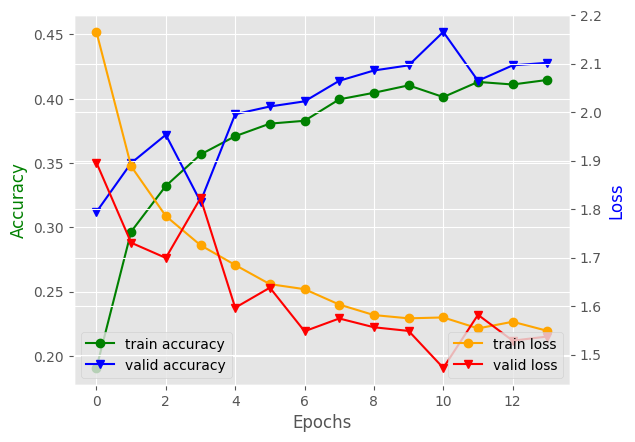

In [32]:
# Visualise the progress of the non-augmented model.
augment_network_model.plot_progress()

In [33]:
# Create the YourModel object with is_augmentation set to False and num_classes set to 10.
non_augment_network_model = YourModel(name = "non-augmented network", is_augmentation = False,  num_classes = 10)

# Call the build_cnn method to build the model with augmentation disabled and display the summary.
non_augment_network_model.build_cnn()
non_augment_network_model.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_20 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_112 (Conv2D)         (None, 32, 32, 32)           896       ['input_20[0][0]']            
                                                                                                  
 activation_108 (Activation  (None, 32, 32, 32)           0         ['conv2d_112[0][0]']          
 )                                                                                                
                                                                                                  
 conv2d_113 (Conv2D)         (None, 32, 32, 32)           9248      ['activation_108[0][0]'

In [34]:
# Train the non-augmented model.
non_augment_network_model.fit(data_manager , num_epochs = 20)

Epoch 1/20
450/450 [==============================] - 24s 49ms/step - loss: 2.1249 - accuracy: 0.2084 - val_loss: 1.8253 - val_accuracy: 0.3300
Epoch 2/20
450/450 [==============================] - 21s 48ms/step - loss: 1.7674 - accuracy: 0.3444 - val_loss: 1.6893 - val_accuracy: 0.3780
Epoch 3/20
450/450 [==============================] - 22s 49ms/step - loss: 1.6510 - accuracy: 0.3878 - val_loss: 1.6244 - val_accuracy: 0.4140
Epoch 4/20
450/450 [==============================] - 23s 50ms/step - loss: 1.5826 - accuracy: 0.4278 - val_loss: 1.5760 - val_accuracy: 0.4280
Epoch 5/20
450/450 [==============================] - 14s 32ms/step - loss: 1.5349 - accuracy: 0.4278 - val_loss: 1.5376 - val_accuracy: 0.4440
Epoch 6/20
450/450 [==============================] - 25s 56ms/step - loss: 1.4841 - accuracy: 0.4564 - val_loss: 1.5050 - val_accuracy: 0.4520
Epoch 7/20
450/450 [==============================] - 16s 36ms/step - loss: 1.4413 - accuracy: 0.4758 - val_loss: 1.4809 - val_accuracy:

In [35]:
# Extract a batch of test data using the 'optimize_data_pipeline' method.
x_test_batch = non_augment_network_model.optimize_data_pipeline(data_manager.ds_test)
# Compute the accuracy of the non-augmented model on the test batch.
non_augment_network_model.compute_accuracy(x_test_batch)

250/250 [==============================] - 5s 18ms/step - loss: 1.4013 - accuracy: 0.4814
loss: 1.4012953042984009
accuracy: 0.4813750088214874


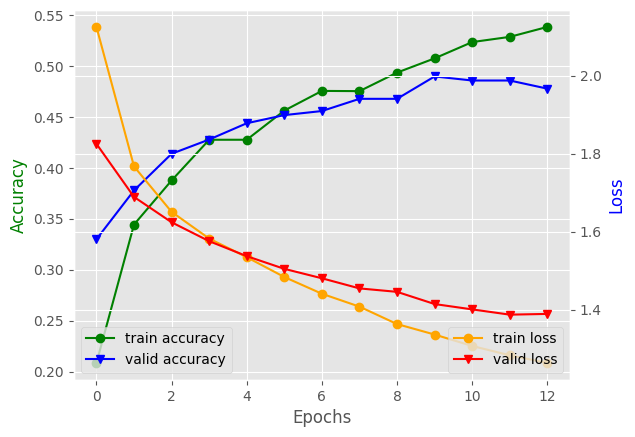

In [36]:
# Visualise the progress of the non-augmented model.
non_augment_network_model.plot_progress()

### <span style="color:#0b486b">Question 3.7: Explore data mixup technique</span>

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

The mixup-trained model overall has a lower training and validation accuracies (3.6% and 27.8% respectively) than the non-mixup trained model (57.2% and 49% respectively). However, this could be an indication of the Mixup-trained model ability to minimise overfitting as they shown an better performance for the validation data compared to the training data, demonstrating it has improved generalisation to unseen data. Furthermore, the Mixup-trained model stopped early (reaching its maximum validation accuracy) faster compared to the non-mixup trained mode, showcasing it has a higher and faster learning rate.

In [37]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        """
        This method constructs a Convolutional Neural Network (CNN) architecture with 2 blocks, 32 feature maps, batch normalization 
        if enabled, skip connections enabled by  default, activation functions is relu and dropout rate is 0.2. is_augmentation is False 
        by default. The resulting model is compiled with the adam optimiser, metrics and loss function for training.
        """
        # Define the input layer with the specified height, width, and depth.
        input_layer = Input((self.height, self.width, self.depth))
        x = input_layer  # Start with the input as the current layer.

        i = 0
        # Create convolutional blocks with each iteration (Maximum 2 blocks).
        while i < self.num_blocks:
            # Create the Convolutional Layer using the Conv2D object from keras.layers.
            x = Conv2D(self.feature_maps[i], (3, 3), (1, 1), "same", activation = self.activation_func)(x)

            # Save the current feature map for skip connection.
            x_skip = x
            
            # Run x through the Batch Normalisation (if enabled).
            if self.batch_norm:
                x = BatchNormalization()(x)

            # Run x through the Activation Function.
            x = Activation(activation = self.activation_func)(x)

            # Create another Convolutional Layer
            x = Conv2D(self.feature_maps[i], (3, 3), (1, 1), "same", activation = self.activation_func)(x)

            # Run x through the Batch Normalisation (if enabled).
            if self.batch_norm:
                x = BatchNormalization()(x)

            # If Skip Connection is enabled, add the skip connection to the current x value.
            if self.use_skip:
                x = Add()([x_skip, x])  # Add the skip connection.

            # Run x through the Activation Function.
            x = Activation(activation = self.activation_func)(x)

            # Max-Pooling Layer using AveragePooling2D from keras.layers.
            x = AveragePooling2D((2, 2), (2, 2), "same")(x)

            # If drop_rate is greater than 0, then use Dropout.
            if 0 < self.drop_rate:
                x = Dropout(rate = self.drop_rate)(x)
                
            i += 1      # Increment i by one.

        # Flatten the output.
        x = Flatten()(x)

        # Fully Connected Layer with Softmax Activation Function for classification.
        x = Dense(self.num_classes, "softmax")(x)

        # Create the model with input being the input_layer and outputs being x.
        self.model = Model(input_layer, x)

        # Compile the model with specified optimiser instance variable, metrics, and loss function.
        self.model.compile(optimizer = self.optimizer, metrics = ["accuracy"], loss = "sparse_categorical_crossentropy")
    
    def extract_data(self, dataset):
        """
        Extracts and concatenates the data and labels from a given dataset.
        """
        # Extract x and y data from the dataset and concatenate it together with numpy.
        x_train_data = np.concatenate([x for x, y in dataset], axis = 0)
        y_train_data = np.concatenate([y for x, y in dataset], axis = 0)
        
        return x_train_data, y_train_data   # Return the training data for x and y.

    def mixup(self, x_train_data, y_train_data):
        """
        Apply mixup data augmentation to input training data and labels.
        """
        # Generate a mixing coefficient by sampling from a beta distribution.
        lambda_sym = np.random.beta(0.4, 0.4)
        
        # Create a random permutation of indices for shuffling the training data.
        i = np.random.permutation(x_train_data.shape[0])
        
        # Mix the input training data using the 'lambda_sym' coefficient and blends the input samples together.
        mixup_x_train = (lambda_sym * x_train_data) + x_train_data[i] * (1 - lambda_sym) 
        
        # Mix the corresponding target labels using the same 'lambda_sym' coefficient, ensuring the abels are mixed in proportion with the
        # input data.
        mixup_y_train = (lambda_sym * y_train_data) + y_train_data[i] * (1 - lambda_sym)
        
        return mixup_x_train, mixup_y_train      # Return the mixed input data and labels.
    
    def fit(self, data_manager, batch_size = None, num_epochs = None):
        """
        This method trains the neural network model on the given dataset, which should be preprocessed and loaded using the DatasetManager. 
        
        If data augmentation is enabled (controlled by the `is_augmentation` instance variable of the model), it applies random transformations 
        to the training data to increase diversity and improve generalisation. These transformations may include random rotations, shifts 
        and horizontal flips.

        Early stopping is employed to monitor the validation accuracy during training. If the validation accuracy
        does not improve for a specified number of consecutive epochs (controlled by the `patience` parameter),
        training is halted, and the model's weights are restored to the best-performing epoch.
        """
        # Set default values for batch_size if not provided based on the instance variables at construction.
        if num_epochs is None:
            num_epochs = self.num_epochs
        
        # Set default values for num_epochs if not provided based on the instance variables at construction.
        if batch_size is None:
            batch_size = self.batch_size
            
        # Optimize the training dataset pipeline using the optimize_data_pipeline method.
        training_dataset = self.optimize_data_pipeline(data_manager.ds_train, batch_size)

        # Extract x_train and y_train data from the training dataset using the extract_data method.
        x_train_data, y_train_data = self.extract_data(training_dataset)

        # Define early stopping based on validation accuracy
        early_training_stopping = EarlyStopping("val_accuracy", restore_best_weights = True, patience = 3)
        
        # Apply data augmentation if enabled based on the is_augmentation instance variable.
        if self.is_augmentation:
            # Call the mixup method to apply data mixup to the model.
            mixup_x_train, mixup_y_train = self.mixup(x_train_data, y_train_data)
            
            # Train the model with mixup enabled. early_stopping_training is added in for this model.
            self.history = self.model.fit(mixup_x_train, mixup_y_train, epochs = num_epochs, callbacks = [early_training_stopping], verbose = self.verbose, validation_data = self.optimize_data_pipeline(data_manager.ds_val, batch_size))
        
        # Else train the model without augmentation or mixup.
        else:
            # Train the model without augmentation.early_stopping_training is added in for this model.
            self.history = self.model.fit(training_dataset, epochs = num_epochs, callbacks = [early_training_stopping], verbose = self.verbose, validation_data = self.optimize_data_pipeline(data_manager.ds_val, batch_size))

In [38]:
# Create the YourModel object with is_augmentation set to True for mixup and num_classes set to 10.
mixup_network_model = YourModel(name = "mixup network", is_augmentation = True, num_classes = 10)

# Call the build_cnn method to build the model with augmentation enabled for data mixup and display the summary.
mixup_network_model.build_cnn()
mixup_network_model.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_116 (Conv2D)         (None, 32, 32, 32)           896       ['input_21[0][0]']            
                                                                                                  
 activation_112 (Activation  (None, 32, 32, 32)           0         ['conv2d_116[0][0]']          
 )                                                                                                
                                                                                                  
 conv2d_117 (Conv2D)         (None, 32, 32, 32)           9248      ['activation_112[0][0]'

In [39]:
# Train the mixup model.
mixup_network_model.fit(data_manager, num_epochs = 20)

Epoch 1/20
141/141 [==============================] - 10s 65ms/step - loss: 2.1844 - accuracy: 0.0147 - val_loss: 2.2801 - val_accuracy: 0.2360
Epoch 2/20
141/141 [==============================] - 9s 63ms/step - loss: 2.0258 - accuracy: 0.0238 - val_loss: 2.1459 - val_accuracy: 0.2440
Epoch 3/20
141/141 [==============================] - 8s 60ms/step - loss: 1.8962 - accuracy: 0.0264 - val_loss: 2.1742 - val_accuracy: 0.2140
Epoch 4/20
141/141 [==============================] - 9s 64ms/step - loss: 1.8246 - accuracy: 0.0307 - val_loss: 2.0636 - val_accuracy: 0.2480
Epoch 5/20
141/141 [==============================] - 9s 61ms/step - loss: 1.7905 - accuracy: 0.0300 - val_loss: 2.0949 - val_accuracy: 0.2380
Epoch 6/20
141/141 [==============================] - 9s 61ms/step - loss: 1.7577 - accuracy: 0.0307 - val_loss: 2.0603 - val_accuracy: 0.2440
Epoch 7/20
141/141 [==============================] - 9s 61ms/step - loss: 1.7302 - accuracy: 0.0327 - val_loss: 2.0109 - val_accuracy: 0.276

In [40]:
# Extract a batch of test data using the 'optimize_data_pipeline' method.
x_test_batch = mixup_network_model.optimize_data_pipeline(data_manager.ds_test)
# Compute the accuracy of the mixup model on the test batch.
mixup_network_model.compute_accuracy(x_test_batch)

250/250 [==============================] - 4s 17ms/step - loss: 1.9720 - accuracy: 0.2873
loss: 1.9719579219818115
accuracy: 0.28725001215934753


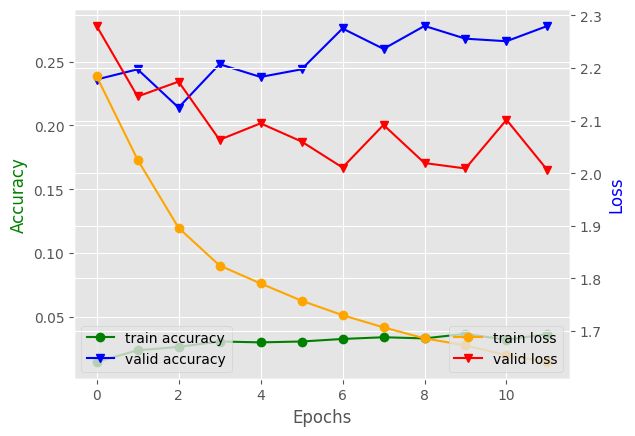

In [41]:
# Visualise the progress of the mixup model.
mixup_network_model.plot_progress()

In [42]:
# Create the YourModel object with is_augmentation set to False for no mixup and num_classes set to 10.
non_mixup_network_model = YourModel(name = "mixup network", is_augmentation = False, num_classes = 10)

# Call the build_cnn method to build the model with augmentation disabled for data mixup and display the summary.
non_mixup_network_model.build_cnn()
non_mixup_network_model.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_22 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_120 (Conv2D)         (None, 32, 32, 32)           896       ['input_22[0][0]']            
                                                                                                  
 activation_116 (Activation  (None, 32, 32, 32)           0         ['conv2d_120[0][0]']          
 )                                                                                                
                                                                                                  
 conv2d_121 (Conv2D)         (None, 32, 32, 32)           9248      ['activation_116[0][0]'

In [43]:
# Train the non-mixup model.
non_mixup_network_model.fit(data_manager, num_epochs = 20)

Epoch 1/20
450/450 [==============================] - 13s 28ms/step - loss: 2.1537 - accuracy: 0.2009 - val_loss: 1.8760 - val_accuracy: 0.3280
Epoch 2/20
450/450 [==============================] - 12s 26ms/step - loss: 1.7888 - accuracy: 0.3418 - val_loss: 1.6851 - val_accuracy: 0.3820
Epoch 3/20
450/450 [==============================] - 12s 26ms/step - loss: 1.6657 - accuracy: 0.3976 - val_loss: 1.6175 - val_accuracy: 0.4120
Epoch 4/20
450/450 [==============================] - 12s 26ms/step - loss: 1.5936 - accuracy: 0.4231 - val_loss: 1.5748 - val_accuracy: 0.4280
Epoch 5/20
450/450 [==============================] - 11s 25ms/step - loss: 1.5387 - accuracy: 0.4418 - val_loss: 1.5419 - val_accuracy: 0.4400
Epoch 6/20
450/450 [==============================] - 11s 25ms/step - loss: 1.5034 - accuracy: 0.4533 - val_loss: 1.5146 - val_accuracy: 0.4640
Epoch 7/20
450/450 [==============================] - 12s 26ms/step - loss: 1.4618 - accuracy: 0.4693 - val_loss: 1.4913 - val_accuracy:

In [52]:
# Extract a batch of test data using the 'optimize_data_pipeline' method.
x_test_batch = non_mixup_network_model.optimize_data_pipeline(data_manager.ds_test)
# Compute the accuracy of the non-mixup model on the test batch.
non_mixup_network_model.compute_accuracy(x_test_batch)

250/250 [==============================] - 7s 26ms/step - loss: 1.3820 - accuracy: 0.4955
loss: 1.3820489645004272
accuracy: 0.49549999833106995


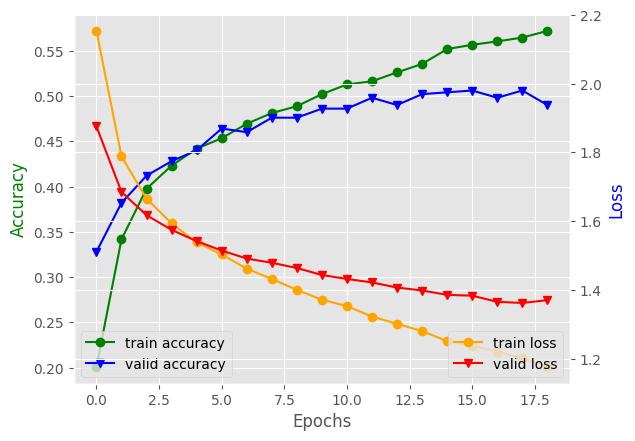

In [53]:
# Visualise the progress of the non=mixup model.
non_mixup_network_model.plot_progress()

### <span style="color:#0b486b">Question 3.8: Attack your model</span>

Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon = 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

## Report
The model initially achieves an accuracy of 57.18% on clean data but exhibits weaker generalisation with an accuracy of 49.00% on the validation set. When subjected to adversarial attacks, the model's robust accuracy significantly declines. PGD attack nets a robust accuracy of 0.5875%, MIM attack results in an accuracy of 0.6250% and lastly under FGSD attack, which has the worst performance, resulting in an accuracy of 0.3750%. 

In [11]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary

# Best obtained model is default model with no skip, no augmentation and no mixup.
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm=None,
                 is_augmentation=False,
                 activation_func='relu',
                 optimizer='adam',
                 use_skip=False,
                 batch_size=10,
                 num_epochs=20,
                 learning_rate=0.0001,
                 verbose=True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)
    
    def build_cnn(self):
        """
        Build a Convolutional Neural Network (CNN) for image classification.

        This method constructs a CNN architecture with 2 blocks, 32 feature maps, batch normalization if enabled, skip connections enabled by 
        default, activation functions is relu and dropout rate is 0.2. The resulting model is compiled with the adam optimiser, metrics 
        and loss function for training.
        """
        # Define the input layer with the specified height, width, and depth.
        input_layer = Input((self.height, self.width, self.depth))
        x = input_layer  # Start with the input as the current layer.

        i = 0
        # Create convolutional blocks with each iteration (Maximum 2 blocks).
        while i < self.num_blocks:
            # Create the Convolutional Layer using the Conv2D object from keras.layers.
            x = Conv2D(self.feature_maps[i], (3, 3), (1, 1), "same", activation = self.activation_func)(x)

            # Save the current feature map for skip connection.
            x_skip = x
            
            # Run x through the Batch Normalisation (if enabled).
            if self.batch_norm:
                x = BatchNormalization()(x)

            # Run x through the Activation Function.
            x = Activation(activation = self.activation_func)(x)

            # Create another Convolutional Layer
            x = Conv2D(self.feature_maps[i], (3, 3), (1, 1), "same", activation = self.activation_func)(x)

            # Run x through the Batch Normalisation (if enabled).
            if self.batch_norm:
                x = BatchNormalization()(x)

            # If Skip Connection is enabled, add the skip connection to the current x value.
            if self.use_skip:
                x = Add()([x_skip, x])  # Add the skip connection.

            # Run x through the Activation Function.
            x = Activation(activation = self.activation_func)(x)

            # Max-Pooling Layer using AveragePooling2D from keras.layers.
            x = AveragePooling2D((2, 2), (2, 2), "same")(x)

            # If drop_rate is greater than 0, then use Dropout.
            if 0 < self.drop_rate:
                x = Dropout(rate = self.drop_rate)(x)
                
            i += 1      # Increment i by one.

        # Flatten the output.
        x = Flatten()(x)

        # Fully Connected Layer with Softmax Activation Function for classification.
        x = Dense(self.num_classes, "softmax")(x)

        # Create the model with input being the input_layer and outputs being x.
        self.model = Model(input_layer, x)

        # Compile the model with specified optimiser instance variable, metrics, and loss function.
        self.model.compile(optimizer = self.optimizer, metrics = ["accuracy"], loss = "sparse_categorical_crossentropy")

In [12]:
# Attacks
# From Lab 5.
def pgd_attack(model, images, labels = None, epsilon = 0.0313, k = 20, eta = 0.002, clip_value_min = 0., clip_value_max = 1.0, soft_label = False, from_logits = True):
    """
    This function performs the PGD (Projected Gradient Descent) attack on the input images to generate adversarial examples.
    """
    # Define the loss function to compute Cross-Entropy loss from logits or prediction probabilities
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy
    
    # Convert input images and labels to TensorFlow tensors if they are NumPy arrays
    if type(images) is np.ndarray: 
        images = tf.convert_to_tensor(images)
    
    if type(labels) is np.ndarray: 
        labels = tf.convert_to_tensor(labels)
        
    # Initialize an adversarial image with random noise around the original images
    random_noise = tf.random.uniform(shape = images.shape, minval = -epsilon, maxval = epsilon)
    adv_image = images + random_noise

    # Perform PGD attack for 'k' iterations
    for _ in range(k): 
        with tf.GradientTape(watch_accessed_variables = False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                # Use ground-truth labels to calculate the attack loss
                loss = loss_fn(labels, adv_output, from_logits = from_logits)
            else: 
                # Use predicted labels to calculate the attack loss
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits = from_logits)

        # Calculate the gradient of the loss with respect to the adversarial image
        gradient = tape.gradient(loss, adv_image)
        
        # Update the adversarial image by taking a small step in the direction of the gradient
        adv_image = adv_image + eta * tf.sign(gradient)
        
        # Clip the adversarial image to ensure it stays within the specified epsilon range
        adv_image = tf.clip_by_value(adv_image, images - epsilon, images + epsilon)
        
        # Clip the pixel values of the adversarial image to the specified min and max values
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)
        
        # Stop gradient to prevent gradient flow through the adversarial image
        adv_image = tf.stop_gradient(adv_image)
    
    return adv_image        # Return the final adversarial image

def mim_attack(model, images, labels = None, epsilon = 0.0313, gamma = 0.9, k = 20, eta = 0.002, clip_value_min = 0., clip_value_max = 1.0, soft_label = False, from_logits = True):
    """
    This function performs the MIM (Momentum Iterative Method) attack on the input images to generate adversarial examples.
    """
    # Define the loss function to compute Cross-Entropy loss from logits or prediction probabilities
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy
    
    # Convert input images and labels to TensorFlow tensors if they are NumPy arrays
    if type(images) is np.ndarray: 
        images = tf.convert_to_tensor(images)
    
    if type(labels) is np.ndarray: 
        labels = tf.convert_to_tensor(labels)
        
    # Initialize an adversarial image with random noise around the original images
    random_noise = tf.random.uniform(shape = images.shape, minval = -epsilon, maxval = epsilon)
    adv_image = images + random_noise
    adv_noise = random_noise

    # Perform MIM (Momentum Iterative Method) attack for 'k' iterations
    for _ in range(k): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                # Use ground-truth labels to calculate the attack loss
                loss = loss_fn(labels, adv_output, from_logits = from_logits)
            else: 
                # Use predicted labels to calculate the attack loss
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits = from_logits)

        # Calculate the gradient of the loss with respect to the adversarial image
        gradient = tape.gradient(loss, adv_image)
        
        # Update the adversarial image by taking a small step in the direction of the gradient
        adv_image_new = adv_image + eta * tf.sign(gradient)
        
        # Clip the adversarial image to ensure it stays within the specified epsilon range
        adv_image_new = tf.clip_by_value(adv_image_new, images - epsilon, images + epsilon)
        
        # Clip the pixel values of the adversarial image to the specified min and max values
        adv_image_new = tf.clip_by_value(adv_image_new, clip_value_min, clip_value_max)
        
        # Update the noise with momentum
        adv_noise = gamma * adv_noise + (1 - gamma) * (adv_image_new - adv_image)
        
        # Update the adversarial image with the new image
        adv_image = adv_image_new
        
        # Stop gradient to prevent gradient flow through the adversarial image
        adv_image = tf.stop_gradient(adv_image)
    
    # Add the accumulated noise to the final adversarial image
    adv_image = adv_image + adv_noise
    
    # Clip the adversarial image to ensure it stays within the specified epsilon range
    adv_image = tf.clip_by_value(adv_image, images - epsilon, images + epsilon)
    
    # Clip the pixel values of the adversarial image to the specified min and max values
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)
    
    return adv_image    # Return the final adversarial image

def fgsm_attack(model, images, labels = None, epsilon = 0.0313, clip_value_min = 0., clip_value_max = 1.0, soft_label = False, from_logits = True):
    """
    This function performs the FGSM (Fast Gradient Sign Method) attack on the input images to generate adversarial examples.
    """
    # Define the loss function to compute Cross-Entropy loss from logits or prediction probabilities
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy
    
    # Convert input images and labels to TensorFlow tensors if they are NumPy arrays
    if type(images) is np.ndarray: 
        images = tf.convert_to_tensor(images)
    
    if type(labels) is np.ndarray: 
        labels = tf.convert_to_tensor(labels)
        
    # Start gradient tape to track operations on input images
    with tf.GradientTape() as tape: 
        tape.watch(images)
        output = model(images)
        if not soft_label:
            # Use ground-truth labels to calculate the attack loss
            loss = loss_fn(labels, output, from_logits = from_logits)
        else: 
            # Use predicted labels to calculate the attack loss
            pred_label = tf.math.argmax(output, axis=1)
            loss = loss_fn(pred_label, output, from_logits = from_logits)

    # Calculate the gradient of the loss with respect to the input images
    gradient = tape.gradient(loss, images) 
    
    # Create adversarial images by perturbing the original images in the direction of the gradient
    adv_image = images + epsilon * tf.sign(gradient)
    
    # Clip the pixel values of the adversarial image to the specified min and max values
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)
    
    # Stop gradient to prevent gradient flow through the adversarial image
    adv_image = tf.stop_gradient(adv_image)
    
    return adv_image    # Return the adversarial image

In [14]:
# Create the YourModel object that will be attacked.
attacked_network_model = YourModel(name = "network to attack", num_classes = 10)

# Call the build_cnn method to build the model with that will be attaacked and display the summary.
attacked_network_model.build_cnn()
attacked_network_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 average_pooling2d (Average  (None, 16, 16, 32)        0         
 Pooling2D)                                                      
                                                             

In [18]:
# Extract a batch of test data using the 'optimize_data_pipeline' method.
x_test_batch = attacked_network_model.optimize_data_pipeline(data_manager.ds_test)
# Compute the accuracy of the model to be attacked on the test batch.
attacked_network_model.compute_accuracy(x_test_batch)

250/250 [==============================] - 7s 26ms/step - loss: 2.3000 - accuracy: 0.1287
loss: 2.3000478744506836
accuracy: 0.1287499964237213


1/1 [==============================] - 0s 407ms/step


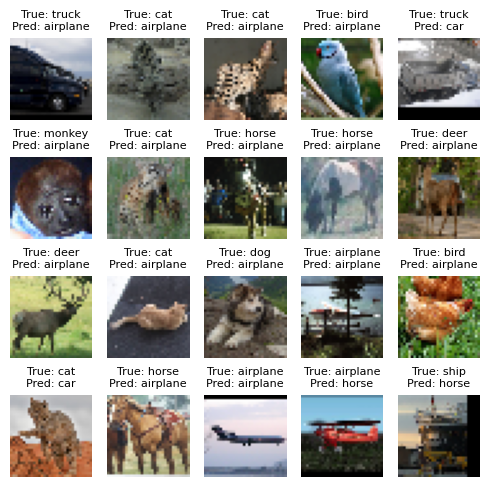

In [22]:
# Take the first 20 samples from the test dataset 'data_manager.ds_test'
sample_dataset = data_manager.ds_test.take(20)
# Call the 'plot_predictions' method on the 'attacked_network_model' instance to visualize predictions of the model on the sample dataset.
attacked_network_model.plot_predictions(sample_dataset, data_manager.ds_info, num_samples = 20, grid_shape = (4, 5))

## Using Projected Gradient Descent Attack on the Model

In [9]:
from sklearn.metrics import accuracy_score

### Robust Accuracy

In [30]:
# Initialize empty lists to store true labels and predicted labels
true_labels = []    # True labels of the original test samples
pred_labels = []    # Predicted labels of the adversarial samples

# Iterate over each sample (x, y) in the test dataset "x_test_batch"
for x, y in x_test_batch:
    # Generate an adversarial example using the PGD attack on the "attacked_network_model"
    x_adversarial = pgd_attack(attacked_network_model.model, x, y)
    
    # Use the model to predict the label for the adversarial example
    label_adversarial = attacked_network_model.model.predict(x_adversarial, verbose = False)
    
    # Convert the predicted label (one-hot encoded) to a single class label using argmax
    converted_label_adversarial = tf.argmax(label_adversarial, axis = -1)
    
    # Extend the "pred_labels" list with the converted adversarial label
    pred_labels.extend(converted_label_adversarial.numpy()) 
    
    # Extend the "true_labels" list with the true label 'y' from the original test sample
    true_labels.extend(y.numpy())

# Calculate the robust accuracy of the model under PGD attack by comparing true and predicted labels
robust_accuracy = accuracy_score(true_labels, pred_labels)

# Print the robust accuracy of the model under the PGD attack
print("Robust Accuracy of Model under PGD Attack: {0}".format(robust_accuracy))

c:\Users\bryan\anaconda3\envs\tf2_cpu\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Robust Accuracy of Model under PGD Attack: 0.005875


### Attack the model, comparing the original and attacked images.

In [23]:
def clean_imagess(number_of_images = 20):
    # Initialize empty lists to store clean images and their labels.
    clean_images = []    # Clean images.
    clean_labels = []    # Labels for the clean images.

    i = 0  # Initialise i as loop counter.
    while i < number_of_images:
        # Get the next batch of data (x, y) from "x_test_batch".
        x, y = next(iter(x_test_batch))

        # Randomly choose 20 indices without replacement from the batch.
        index = np.random.choice(len(x.numpy()), size = number_of_images, replace = False)

        # Extend the "clean_images" and "clean_labels" lists with the selected data.
        clean_images.extend(x.numpy()[index])
        clean_labels.extend(y.numpy()[index])

        i += 1  # Increment i by one.

    # Convert the extended lists to NumPy arrays and limit their size to "number_of_images" (20 by default).
    clean_images = np.array(clean_images)[:number_of_images]  
    clean_labels = np.array(clean_labels)[:number_of_images]
    
    return clean_images, clean_labels     # Return the clean images and their corresponding labels back to caller.

# Call the "clean_imagess" function to generate and store clean images and labels. No input so default the number of images to 20.
clean_images, clean_labels = clean_imagess()

c:\Users\bryan\anaconda3\envs\tf2_cpu\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


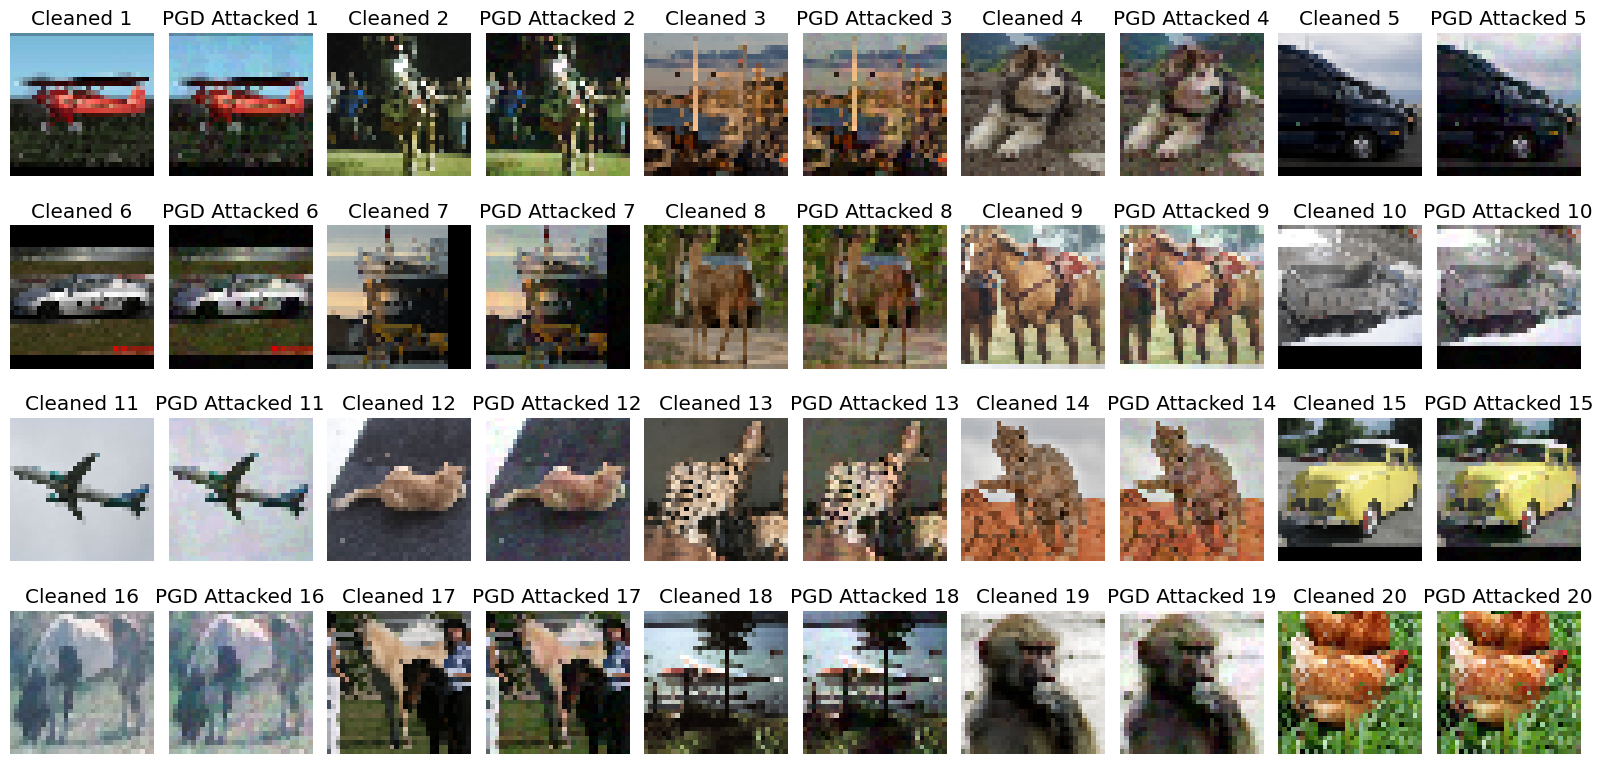

In [24]:
# Generate PGD (Projected Gradient Descent) attacked images using the pgd_attack function.
pgd_images = pgd_attack(attacked_network_model.model, clean_images, clean_labels)

plt.figure(figsize = (16, 8))

i = 0  # Initialise a loop counter as i.
# Iterate over 20 images.
while i < 20:
    # Create a subplot with a 4 x 10 grid, and set the index to 'i'.
    plt.subplot(4, 10, i * 2 + 1)
    
    # Display the original clean image at index 'i'.
    plt.imshow(clean_images[i])
    # Turn off all axis labels for each image.
    plt.axis("off")
    plt.title("Cleaned {0}".format(i + 1))  # Set the title for the clean image.
    
    # Create a subplot for the PGD attacked image on the right.
    plt.subplot(4, 10, i * 2 + 2)
    
    # Display the PGD attacked image at index 'i'.
    plt.imshow(pgd_images[i])
    # Turn off all axis labels for each image.
    plt.axis("off")
    plt.title("PGD Attacked {0}".format(i + 1))  # Set the title for the PGD attacked image.
    
    i += 1  # Increment the loop counter

# Adjust the layout of subplots to be tighter.
plt.tight_layout()

# Show the plot with clean and PGD attacked images side by side.
plt.show()

## Using Momentum Iterative Method Attack on the Model

### Robust Accuracy

In [114]:
# Initialize empty lists to store true labels and predicted labels
true_labels = []    # True labels of the original test samples
pred_labels = []    # Predicted labels of the adversarial samples

# Iterate over each sample (x, y) in the test dataset "x_test_batch"
for x, y in x_test_batch:
    # Generate an adversarial example using the MIM attack on the "attacked_network_model"
    x_adversarial = mim_attack(attacked_network_model.model, x, y)
    
    # Use the model to predict the label for the adversarial example
    label_adversarial = attacked_network_model.model.predict(x_adversarial, verbose=False)
    
    # Convert the predicted label (one-hot encoded) to a single class label using argmax
    converted_label_adversarial = tf.argmax(label_adversarial, axis = -1)
    
    # Extend the "pred_labels" list with the converted adversarial label
    pred_labels.extend(converted_label_adversarial.numpy()) 
    
    # Extend the "true_labels" list with the true label 'y' from the original test sample
    true_labels.extend(y.numpy())

# Calculate the robust accuracy of the model under MIM attack by comparing true and predicted labels
robust_accuracy = accuracy_score(true_labels, pred_labels)

# Print the robust accuracy of the model under the MIM attack
print("Robust Accuracy of Model under MIM Attack: {0}".format(robust_accuracy))

c:\Users\bryan\anaconda3\envs\tf2_cpu\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Robust Accuracy of Model under MIM Attack: 0.00625


### Attack the model, comparing the original and attacked images.

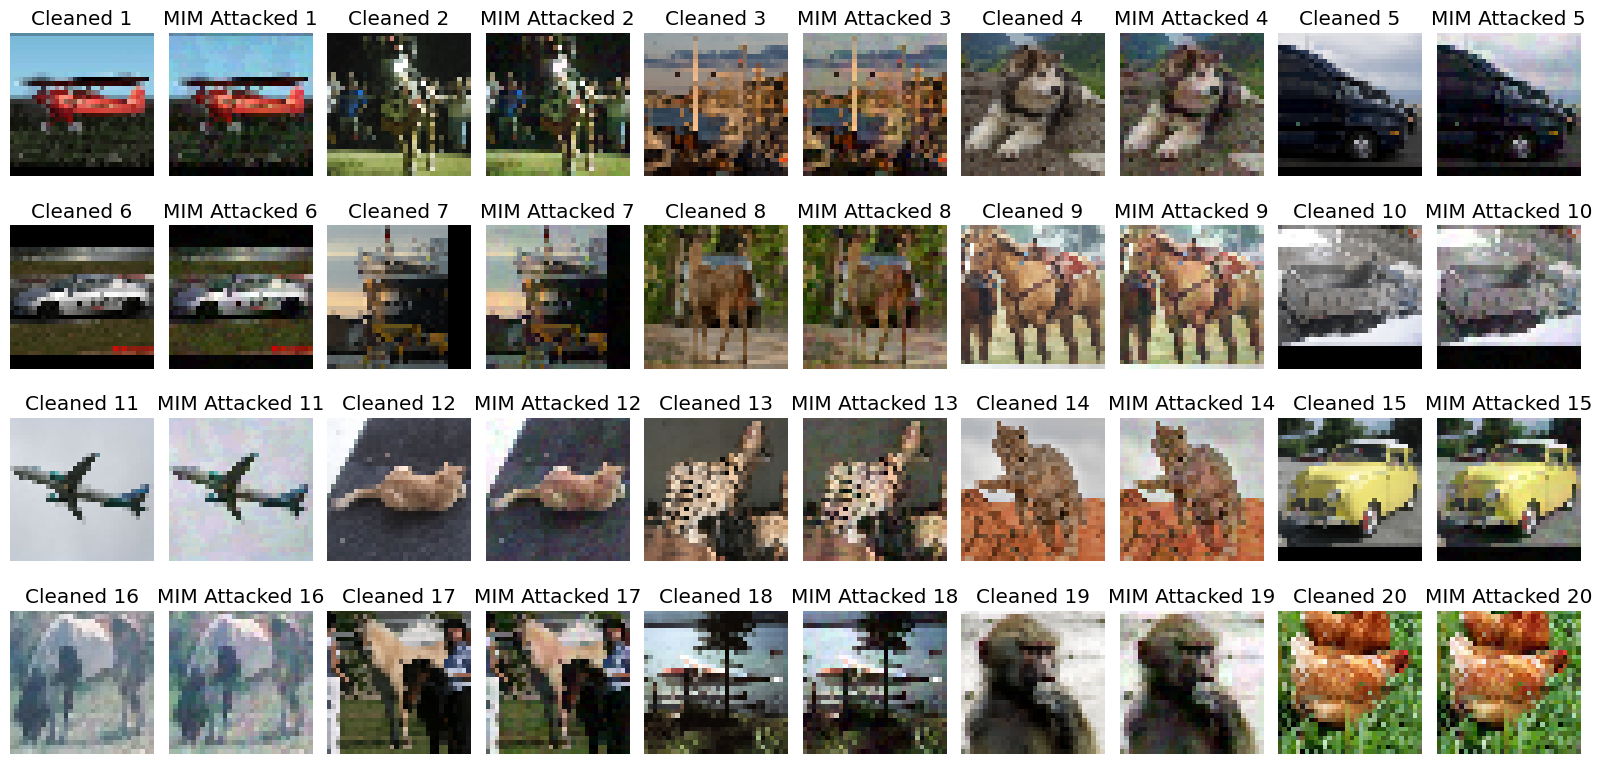

In [25]:
# Generate MIM (Momentum Iterative Method) attacked images using the mim_attack function.
mim_images = mim_attack(attacked_network_model.model, clean_images, clean_labels)

plt.figure(figsize = (16, 8))

i = 0  # Initialise a loop counter as i.
# Iterate over 20 images.
while i < 20:
    # Create a subplot with a 4 x 10 grid, and set the index to 'i'.
    plt.subplot(4, 10, i * 2 + 1)
    
    # Display the original clean image at index 'i'.
    plt.imshow(clean_images[i])
    # Turn off all axis labels for each image.
    plt.axis("off")
    plt.title("Cleaned {0}".format(i + 1))  # Set the title for the clean image.
    
    # Create a subplot for the MIM attacked image on the right.
    plt.subplot(4, 10, i * 2 + 2)
    
    # Display the MIM attacked image at index 'i'.
    plt.imshow(mim_images[i])
    # Turn off all axis labels for each image.
    plt.axis("off")
    plt.title("MIM Attacked {0}".format(i + 1))  # Set the title for the MIM attacked image.
    
    i += 1  # Increment the loop counter

# Adjust the layout of subplots to be tighter.
plt.tight_layout()

# Show the plot with clean and MIM attacked images side by side.
plt.show()

## Using Fast Gradient Sign Method Attack on the Model

### Robust Accuracy

In [116]:
# Initialize empty lists to store true labels and predicted labels
true_labels = []    # True labels of the original test samples
pred_labels = []    # Predicted labels of the adversarial samples

# Iterate over each sample (x, y) in the test dataset "x_test_batch"
for x, y in x_test_batch:
    # Generate an adversarial example using the FGSM attack on the "attacked_network_model"
    x_adversarial = fgsm_attack(attacked_network_model.model, x, y)
    
    # Use the model to predict the label for the adversarial example
    label_adversarial = attacked_network_model.model.predict(x_adversarial, verbose=False)
    
    # Convert the predicted label (one-hot encoded) to a single class label using argmax
    converted_label_adversarial = tf.argmax(label_adversarial, axis = -1)
    
    # Extend the "pred_labels" list with the converted adversarial label
    pred_labels.extend(converted_label_adversarial.numpy()) 
    
    # Extend the "true_labels" list with the true label 'y' from the original test sample
    true_labels.extend(y.numpy())

# Calculate the robust accuracy of the model under FGSM attack by comparing true and predicted labels
robust_accuracy = accuracy_score(true_labels, pred_labels)

# Print the robust accuracy of the model under the FGSM attack
print("Robust Accuracy of Model under FGSM Attack: {0}".format(robust_accuracy))

Robust Accuracy of Model under FGSM Attack: 0.00375


### Attack the model, comparing the original and attacked images.

c:\Users\bryan\anaconda3\envs\tf2_cpu\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


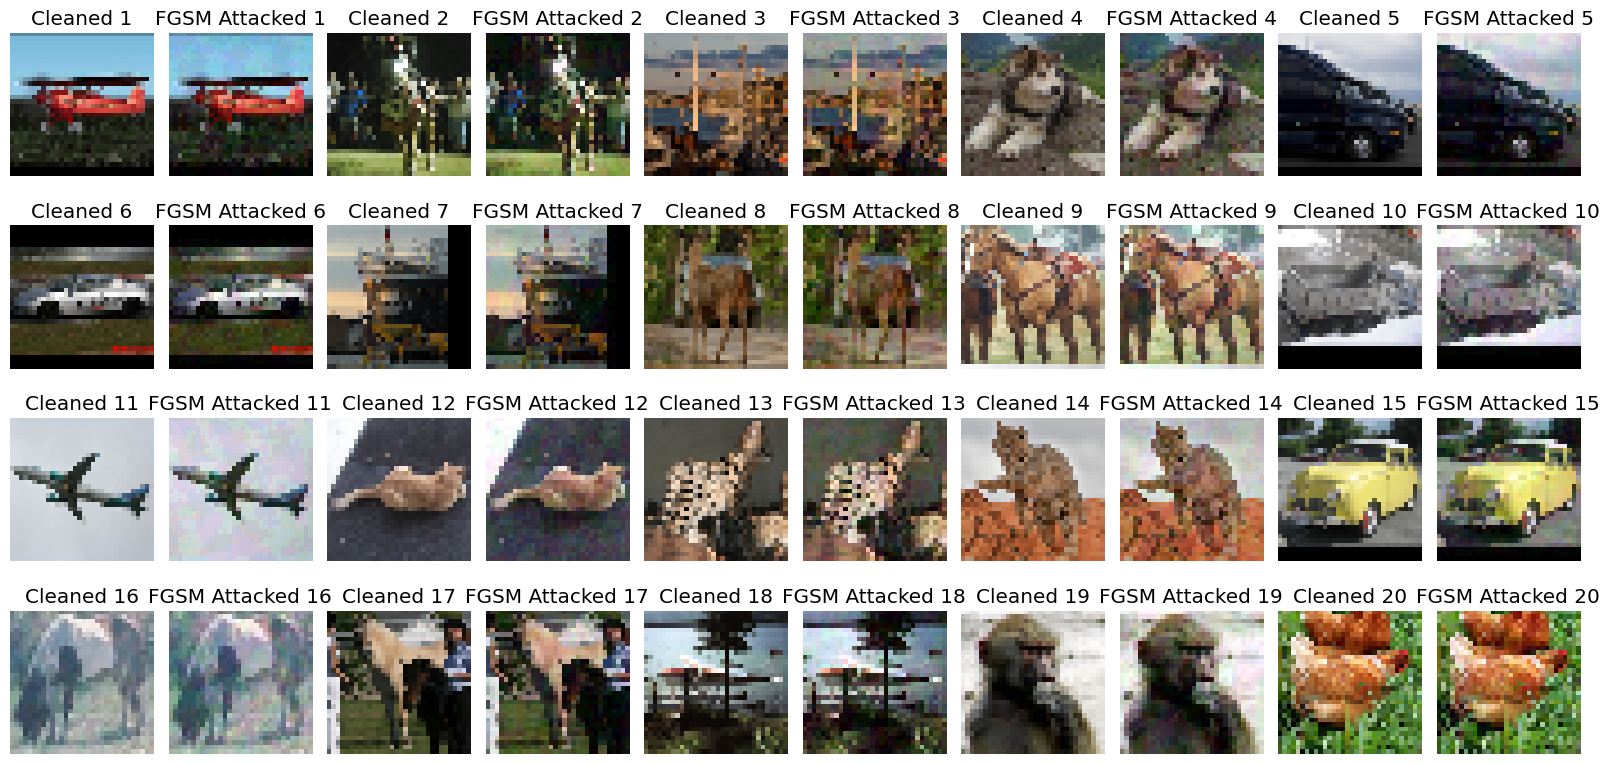

In [26]:
# Generate FGSM (Fast Gradient Sign Method) attacked images using the fgsd_attack function.
fgsm_images = fgsm_attack(attacked_network_model.model, clean_images, clean_labels)

plt.figure(figsize = (16, 8))

i = 0  # Initialise a loop counter as i.
# Iterate over 20 images.
while i < 20:
    # Create a subplot with a 4 x 10 grid, and set the index to 'i'.
    plt.subplot(4, 10, i * 2 + 1)
    
    # Display the original clean image at index 'i'.
    plt.imshow(clean_images[i])
    # Turn off all axis labels for each image.
    plt.axis("off")
    plt.title("Cleaned {0}".format(i + 1))  # Set the title for the clean image.
    
    # Create a subplot for the FGSM attacked image on the right.
    plt.subplot(4, 10, i * 2 + 2)
    
    # Display the FGSM attacked image at index 'i'.
    plt.imshow(fgsm_images[i])
    # Turn off all axis labels for each image.
    plt.axis("off")
    plt.title("FGSM Attacked {0}".format(i + 1))  # Set the title for the FGSM attacked image.
    
    i += 1  # Increment the loop counter

# Adjust the layout of subplots to be tighter.
plt.tight_layout()

# Show the plot with clean and FGSM attacked images side by side.
plt.show()

### <span style="color:#0b486b">Question 3.9: Train a robust model</span>

Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

### Report

The robust model shown remarkable increase in performance once trained with PGD adversarial training. So much so that its accuracy under PGD attacked increased to 28.9% from 0.59%. Under MIM attack, the accuracy jumped to 29.1% from the initial 0.63%. Lastly, the accuracy under FGSM attack for the robusat model was 27.5% compared to 0.38% of the original.

The robust model performed the best in the MIM attack and the worst under FGSM attack.

In [36]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary

# Best obtained model is default model with no skip, no augmentation and no mixup.
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm=None,
                 is_augmentation=False,
                 activation_func='relu',
                 optimizer='adam',
                 use_skip=False,
                 batch_size=10,
                 num_epochs=20,
                 learning_rate=0.0001,
                 verbose=True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)
    
    def build_cnn(self):
        """
        Build a Convolutional Neural Network (CNN) for image classification.

        This method constructs a CNN architecture with 2 blocks, 32 feature maps, batch normalization if enabled, skip connections enabled by 
        default, activation functions is relu and dropout rate is 0.2. The resulting model is compiled with the adam optimiser, metrics 
        and loss function for training.
        """
        # Define the input layer with the specified height, width, and depth.
        input_layer = Input((self.height, self.width, self.depth))
        x = input_layer  # Start with the input as the current layer.

        i = 0
        # Create convolutional blocks with each iteration (Maximum 2 blocks).
        while i < self.num_blocks:
            # Create the Convolutional Layer using the Conv2D object from keras.layers.
            x = Conv2D(self.feature_maps[i], (3, 3), (1, 1), "same", activation = self.activation_func)(x)

            # Save the current feature map for skip connection.
            x_skip = x
            
            # Run x through the Batch Normalisation (if enabled).
            if self.batch_norm:
                x = BatchNormalization()(x)

            # Run x through the Activation Function.
            x = Activation(activation = self.activation_func)(x)

            # Create another Convolutional Layer
            x = Conv2D(self.feature_maps[i], (3, 3), (1, 1), "same", activation = self.activation_func)(x)

            # Run x through the Batch Normalisation (if enabled).
            if self.batch_norm:
                x = BatchNormalization()(x)

            # If Skip Connection is enabled, add the skip connection to the current x value.
            if self.use_skip:
                x = Add()([x_skip, x])  # Add the skip connection.

            # Run x through the Activation Function.
            x = Activation(activation = self.activation_func)(x)

            # Max-Pooling Layer using AveragePooling2D from keras.layers.
            x = AveragePooling2D((2, 2), (2, 2), "same")(x)

            # If drop_rate is greater than 0, then use Dropout.
            if 0 < self.drop_rate:
                x = Dropout(rate = self.drop_rate)(x)
                
            i += 1      # Increment i by one.

        # Flatten the output.
        x = Flatten()(x)

        # Fully Connected Layer with Softmax Activation Function for classification.
        x = Dense(self.num_classes, "softmax")(x)

        # Create the model with input being the input_layer and outputs being x.
        self.model = Model(input_layer, x)

        # Compile the model with specified optimiser instance variable, metrics, and loss function.
        self.model.compile(optimizer = self.optimizer, metrics = ["accuracy"], loss = "sparse_categorical_crossentropy")

In [18]:
# Create an instance of your robust model with the specified name and number of classes.
robust_network_model = YourModel(name = "robust model", num_classes = 10)
# Build the architecture of the CNN (Convolutional Neural Network) for the robust model.
robust_network_model.build_cnn()

# Optimise the data pipeline for training using the 'data_manager.ds_train' dataset.
x_train_batch = robust_network_model.optimize_data_pipeline(data_manager.ds_train, batch_size = 32)
# Optimise the data pipeline for validation using the 'data_manager.ds_val' dataset.
x_val_batch = robust_network_model.optimize_data_pipeline(data_manager.ds_val, batch_size = 32)

In [19]:
# Loop over 20 training epochs.
for epoch in range(20):
    # Loop through the training batches.
    for x, y in x_train_batch:
        # Generate adversarial examples using PGD attack.
        x_adversarial = pgd_attack(robust_network_model.model, x, y)
        
        # Train the model on the adversarial examples.
        robust_network_model.model.train_on_batch(x_adversarial, y)

    # Evaluate the model on the validation set.
    validation_loss, validation_accuracy = robust_network_model.model.evaluate(x_val_batch)
    
    # Print validation loss and accuracy for the current epoch.
    print("Epoch {0}/20, Validation Loss: {1}, Validation Accuracy: {2}".format(epoch + 1, validation_loss, validation_accuracy))
    
# Compute and print the accuracy of the robust model on the validation set.shame    
robust_network_model.compute_accuracy(x_val_batch)

16/16 [==============================] - 0s 17ms/step - loss: 2.2336 - accuracy: 0.2180
Epoch 1/20, Validation Loss: 2.233584403991699, Validation Accuracy: 0.21799999475479126
16/16 [==============================] - 0s 14ms/step - loss: 1.8734 - accuracy: 0.2960
Epoch 2/20, Validation Loss: 1.8734312057495117, Validation Accuracy: 0.29600000381469727
16/16 [==============================] - 0s 13ms/step - loss: 1.7605 - accuracy: 0.3300
Epoch 3/20, Validation Loss: 1.7605421543121338, Validation Accuracy: 0.33000001311302185
16/16 [==============================] - 0s 14ms/step - loss: 1.7126 - accuracy: 0.3520
Epoch 4/20, Validation Loss: 1.7126141786575317, Validation Accuracy: 0.35199999809265137
16/16 [==============================] - 1s 35ms/step - loss: 1.6768 - accuracy: 0.3560
Epoch 5/20, Validation Loss: 1.6768397092819214, Validation Accuracy: 0.35600000619888306
16/16 [==============================] - 0s 16ms/step - loss: 1.6489 - accuracy: 0.3680
Epoch 6/20, Validation 

In [21]:
# Save the robust model.
robust_network_model.model.save("models/")

INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets


In [23]:
# Load the robust model.
loaded_model = tf.keras.models.load_model("models/")
robust_network_model = YourModel(name = "robust network model", num_classes = 10)
robust_network_model.model = loaded_model

robust_network_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 average_pooling2d_4 (Avera  (None, 16, 16, 32)        0         
 gePooling2D)                                                    
                                                           

In [30]:
# Compute the accuracy of the robust model on the test batch.
robust_network_model.compute_accuracy(x_test_batch)

250/250 [==============================] - 5s 19ms/step - loss: 1.5088 - accuracy: 0.4428
loss: 1.508795142173767
accuracy: 0.4427500069141388


## Attacking the model with PGD.

In [32]:
# Initialize empty lists to store true labels and predicted labels
true_labels = []    # True labels of the original test samples
pred_labels = []    # Predicted labels of the adversarial samples

# Iterate over each sample (x, y) in the test dataset "x_test_batch"
for x, y in x_test_batch:
    # Generate an adversarial example using the PGD attack on the "robust_network_model"
    x_adversarial = pgd_attack(robust_network_model.model, x, y)
    
    # Use the model to predict the label for the adversarial example
    label_adversarial = robust_network_model.model.predict(x_adversarial, verbose = False)
    
    # Convert the predicted label (one-hot encoded) to a single class label using argmax
    converted_label_adversarial = tf.argmax(label_adversarial, axis = -1)
    
    # Extend the "pred_labels" list with the converted adversarial label
    pred_labels.extend(converted_label_adversarial.numpy()) 
    
    # Extend the "true_labels" list with the true label 'y' from the original test sample
    true_labels.extend(y.numpy())

# Calculate the robust accuracy of the model under PGD attack by comparing true and predicted labels
robust_accuracy = accuracy_score(true_labels, pred_labels)

# Print the robust accuracy of the model under the PGD attack
print("Robust Accuracy of Model under PGD Attack: {0}".format(robust_accuracy))

c:\Users\bryan\anaconda3\envs\tf2_cpu\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Robust Accuracy of Model under PGD Attack: 0.28925


## Attacking the model with MIM.

In [33]:
# Initialize empty lists to store true labels and predicted labels
true_labels = []    # True labels of the original test samples
pred_labels = []    # Predicted labels of the adversarial samples

# Iterate over each sample (x, y) in the test dataset "x_test_batch"
for x, y in x_test_batch:
    # Generate an adversarial example using the MIM attack on the "robust_network_model"
    x_adversarial = mim_attack(robust_network_model.model, x, y)
    
    # Use the model to predict the label for the adversarial example
    label_adversarial = robust_network_model.model.predict(x_adversarial, verbose=False)
    
    # Convert the predicted label (one-hot encoded) to a single class label using argmax
    converted_label_adversarial = tf.argmax(label_adversarial, axis = -1)
    
    # Extend the "pred_labels" list with the converted adversarial label
    pred_labels.extend(converted_label_adversarial.numpy()) 
    
    # Extend the "true_labels" list with the true label 'y' from the original test sample
    true_labels.extend(y.numpy())

# Calculate the robust accuracy of the model under MIM attack by comparing true and predicted labels
robust_accuracy = accuracy_score(true_labels, pred_labels)

# Print the robust accuracy of the model under the MIM attack
print("Robust Accuracy of Model under MIM Attack: {0}".format(robust_accuracy))

c:\Users\bryan\anaconda3\envs\tf2_cpu\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Robust Accuracy of Model under MIM Attack: 0.290875


## Attacking the model with FGSM.

In [34]:
# Initialize empty lists to store true labels and predicted labels
true_labels = []    # True labels of the original test samples
pred_labels = []    # Predicted labels of the adversarial samples

# Iterate over each sample (x, y) in the test dataset "x_test_batch"
for x, y in x_test_batch:
    # Generate an adversarial example using the FGSM attack on the "robust_network_model"
    x_adversarial = fgsm_attack(robust_network_model.model, x, y)
    
    # Use the model to predict the label for the adversarial example
    label_adversarial = robust_network_model.model.predict(x_adversarial, verbose=False)
    
    # Convert the predicted label (one-hot encoded) to a single class label using argmax
    converted_label_adversarial = tf.argmax(label_adversarial, axis = -1)
    
    # Extend the "pred_labels" list with the converted adversarial label
    pred_labels.extend(converted_label_adversarial.numpy()) 
    
    # Extend the "true_labels" list with the true label 'y' from the original test sample
    true_labels.extend(y.numpy())

# Calculate the robust accuracy of the model under FGSM attack by comparing true and predicted labels
robust_accuracy = accuracy_score(true_labels, pred_labels)

# Print the robust accuracy of the model under the FGSM attack
print("Robust Accuracy of Model under FGSM Attack: {0}".format(robust_accuracy))

c:\Users\bryan\anaconda3\envs\tf2_cpu\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Robust Accuracy of Model under FGSM Attack: 0.27475


The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try. 

### <span style="color:#0b486b">Question 3.10</span> (bonus question)

Read the SAM paper ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)). Try to apply this technique to the best obtained model and report the results. For the purpose of implementing SAM, we can flexibly add more cells and extensions to the `model.py` file.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [35]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary


--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**